## Noise Generation
Check out issue [#4](https://github.com/Project-THI/Hough-Transformations/issues/4) on the repository. 

<details><summary>Explanation</summary>

1. Generate tensors of the shape `33x33x33` with random complex numbers, real and imaginary parts are in the range `[-1, 1]`. These parts are stored as a list, not ´a + bi´.
2. Generate random noise with given noise (default is 33x33x33).
3. Overlaps the noise tensor with the qspace vector (`aN`).
4. Apply noise with the formular `Q + aN = G`. 

</details>

<details><summary>Functions</summary>

- `gen_noise` generates the noise tensor.
- `apply_noise` applies the noise tensor to the qspace vector.
- `visualize` visualizes a given tensor based on the magnitudes.
- `get_mags` returns the magnitudes of a given tensor (experimental).

</details>

<details><summary>Formular</summary>

### Noise Application
The formula to apply noise to the data. 

$Q + aN = G$

$Q$ is the qspace vector <br>
$a$ is the noise factor <br>
$N$ is the noise tensor <br>
$G$ is the noisy qspace vector <br>

</details>

In [1]:
import torch
import numpy as np
import PyQt6
import matplotlib.pyplot as plt

from functions import get_mags, visualize, gen_noise, apply_noise

In [2]:
# pick a voxel from the dataset
# voxel_num = random.randint(0, 500)
# voxel_num = 454
voxel_num = 141

# range of magnitudes 
range_int = [0.6,1]

# noise factor
factor = 0.1

In [3]:
test_noise = gen_noise(33, log=False, seed=None)

/home/matthias/.local/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


_Note:_ When plotting a noise slice, the center should have more higher and fluctuating values than the edges.

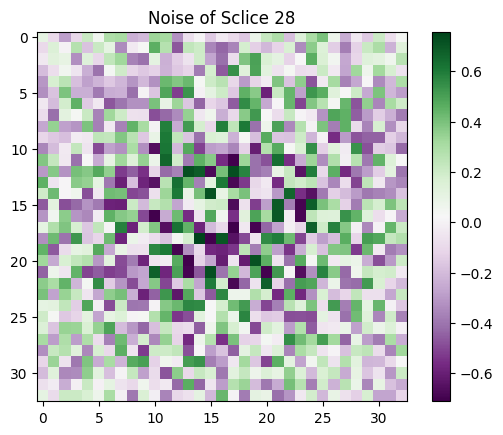

In [4]:
slice = np.random.randint(0, 32)

plt.imshow(test_noise[slice,:,:,0], cmap='PRGn')
plt.colorbar()
plt.title('Noise of Sclice ' + str(slice))
plt.show()

### 🏗️ Testing 🏗️
Load a preprocessed qspace tensor and pick one sample, in this example my tensor is already normalized. 

In [5]:
# load a voxel
voxel = torch.load('/home/matthias/Github/Hough-Transformations/data/qspace_orig01.pt')[voxel_num]            # nr01.pt is normalised

# generate noise
noise = gen_noise(log=False)

# apply noise to the voxel
noised_voxel = apply_noise(voxel, noise, factor, log=False)

In [6]:
# if normalized, min and max are 0 and 1
print('min of voxel =', voxel.min().item())
print('max of voxel =', voxel.max().item())
print('min of noised_voxel =', noised_voxel.min().item())
print('max of noised_voxel =', noised_voxel.max().item())

min of voxel = -1.2214273890872247
max of voxel = 2.0369872385185828e+16
min of noised_voxel = 0.0
max of noised_voxel = 1.0


In [7]:
# theoretically, the difference in the center should be higher than on the edge
print('edge:', (voxel - noised_voxel)[0, 0, 0])
print('cntr:', (voxel - noised_voxel)[16, 16, 16])
print('edge:', (voxel - noised_voxel)[32, 32, 32])

edge: tensor([1.3151e+16, 4.4545e-02], dtype=torch.float64)
cntr: tensor([ 2.0370e+16, -5.6702e-17], dtype=torch.float64)
edge: tensor([ 1.3151e+16, -4.4545e-02], dtype=torch.float64)


In [8]:
# get magnitudes, uses own shady function
mag_clean = get_mags(voxel)
mag_noised = get_mags(noised_voxel)

In [9]:
# get mag_clean shape
print('mag_clean shape =', mag_clean.shape)

mag_clean shape = torch.Size([33, 33, 33])


### 🏗️ Visual Testing 🏗️

In [10]:
#%matplotlib qt
#%matplotlib widget

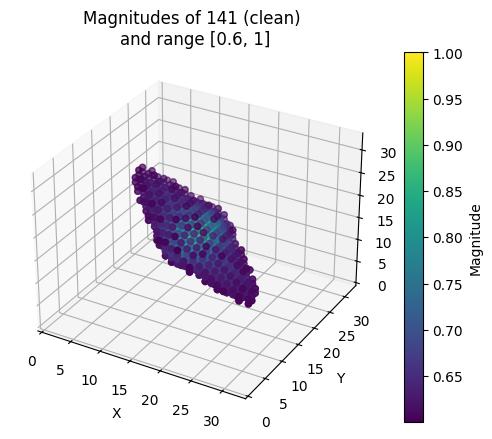

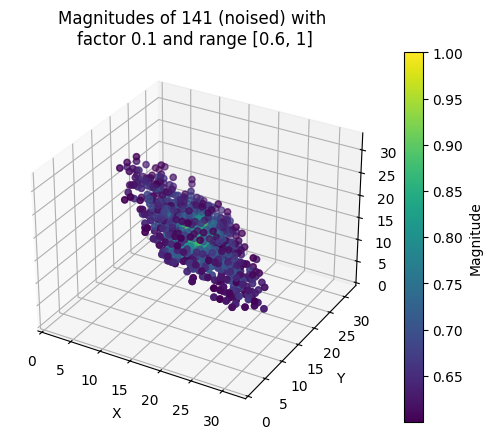

In [11]:
# visualize the data
visualize(mag_clean, int_range=range_int, scale=True, title='Magnitudes of {} (clean) \nand range {}'.format(voxel_num, range_int))
visualize(mag_noised, int_range=range_int, scale=True, title='Magnitudes of {} (noised) with \nfactor {} and range {}'.format(voxel_num, factor, range_int))